In [1]:
%matplotlib inline
import pylhe
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 3]

# LHE File for "p p > H  j, H > S S - MS= 55Gev BR = 17% ptj = 500"
lhe_dm55= pylhe.readLHE("Events/with_ptj150/run_hss_mdm55_ptj150/unweighted_events.lhe")
nEvents_dm = 100000
crssSection_dm = 119.83379466903 #fb

# LHE File for "p p > Z j, Z > vl vl~  n_events = 50 000"
lhe_zj= pylhe.readLHE("Events/with_ptj150/run_zj_ptj150/unweighted_events.lhe")
nEvents_zj = 100000
crssSection_zj = 27233.953 #fb

lumi = 3000 #fb

def momenta(particles, transverse=False):
    total_momentum = 0
    p = [0, 0, 0]
    for ptc in particles:
        p[0] += ptc.px
        p[1] += ptc.py
        p[2] += ptc.pz

    if transverse == True:
        transverse_momentum = np.sqrt(p[0]**2 + p[1]**2)
        return transverse_momentum

    total_momentum = np.sqrt(p[0]**2 + p[1]**2 + p[2]**2)
    return total_momentum

def invariant_mass(event, p_ids):
    matter = []
    e_total = [] 
    for ptc in event.particles:
        if ptc.id in p_ids:
            matter.append(ptc)
            e_total.append(ptc.e)
    return np.sqrt(sum(e_total)**2 - momenta(matter)**2)

def transverse_momentum(event, p_ids):
    matter = []
    for ptc in event.particles:
        if ptc.status > 0 and abs(ptc.id) in p_ids:
            matter.append(ptc)
    return momenta(matter, transverse=True)


jet_ids = [1, 2, 3, 4, 5, 6, 21]

In [ ]:
plt.rcParams['figure.figsize'] = [14, 8]

weight_dm = [(crssSection_dm/nEvents_dm)*lumi]*nEvents_dm
pt_dm = []
for event in lhe_dm55:
    pt = transverse_momentum(event, jet_ids)
    pt_dm.append(pt)

weight_zj = [(crssSection_zj/nEvents_zj)*lumi]*nEvents_zj
pt_zj = []
for event in lhe_zj:
    pt = transverse_momentum(event, jet_ids)
    pt_zj.append(pt)

fig, ax = plt.subplots(1, 1)
bins = range(150, 2600, 100)

# histogram for "p p > H  j, H > S S - MS= 55Gev"
ns_ms55, bins_ms55, patches_ms55 = ax.hist(pt_dm, bins = bins, alpha=0.8, color='blue', label='MS = 55GeV', log=True, edgecolor='blue', histtype='step', weights= weight_dm)
ns_zj, bins_zj, patches_zj = ax.hist(pt_zj, bins = bins, alpha=0.8, color='orange', label='Z', log=True, edgecolor='orange', histtype='step', weights= weight_zj)
ax.set(xlabel='Momentum (GeV)', ylabel='N Events')
ax.legend()

print(sum(ns_ms55), sum(ns_zj))
r = sum(ns_ms55)/(2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj)))
print(r)
print((2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj))))
#PEDIR PRO HIST RETORNAR OS BINS E SOMAR PRA VER SE TA CERTO O Z
#colocar luminosidade

In [ ]:
lhe_dm55= pylhe.readLHE("Events/with_ptj250/run_hss_mdm55_ptj250/unweighted_events.lhe")
nEvents_dm = 100000
crssSection_dm = 30.83369522477 #fb

lhe_zj= pylhe.readLHE("Events/with_ptj250/run_zl_cut250/unweighted_events.lhe")
nEvents_zj = 100000
crssSection_zj = 3887.8891 #fb

plt.rcParams['figure.figsize'] = [14, 8]

weight_dm = [(crssSection_dm/nEvents_dm)*lumi]*nEvents_dm
pt_dm = []
for event in lhe_dm55:
    pt = transverse_momentum(event, jet_ids)
    pt_dm.append(pt)

weight_zj = [(crssSection_zj/nEvents_zj)*lumi]*nEvents_zj
pt_zj = []
for event in lhe_zj:
    pt = transverse_momentum(event, jet_ids)
    pt_zj.append(pt)

fig, ax = plt.subplots(1, 1)
bins = range(250, 2600, 100)

# histogram for "p p > H  j, H > S S - MS= 55Gev"
ns_ms55, bins_ms55, patches_ms55 = ax.hist(pt_dm, bins = bins, alpha=0.8, color='blue', label='MS = 55GeV', log=True, edgecolor='blue', histtype='step', weights= weight_dm)
ns_zj, bins_zj, patches_zj = ax.hist(pt_zj, bins = bins, alpha=0.8, color='orange', label='Z', log=True, edgecolor='orange', histtype='step', weights= weight_zj)
ax.set(xlabel='Momentum (GeV)', ylabel='N Events')
ax.legend()

print(sum(ns_ms55), sum(ns_zj))
r = sum(ns_ms55)/(2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj)))
print(r)
print((2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj))))
#PEDIR PRO HIST RETORNAR OS BINS E SOMAR PRA VER SE TA CERTO O Z
#colocar luminosidade

6650.4670044322265 511639.91999947466
0.12993256782602855
51183.98809247562


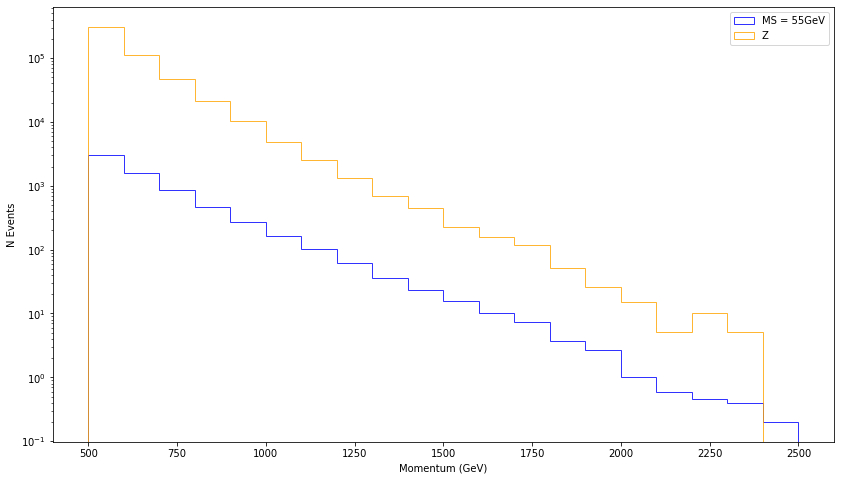

In [2]:
lhe_dm55= pylhe.readLHE("Events/with_ptj800/run_mdm30/unweighted_events.lhe")
nEvents_dm = 100000
crssSection_dm = 0.5685351898420999 #fb

lhe_zj= pylhe.readLHE("Events/with_ptj800/run_zj_ptj800/unweighted_events.lhe")
nEvents_zj = 100000
crssSection_zj = 13.810421 #fb

plt.rcParams['figure.figsize'] = [14, 8]

weight_dm = [(crssSection_dm/nEvents_dm)*lumi]*nEvents_dm
pt_dm = []
for event in lhe_dm55:
    pt = transverse_momentum(event, jet_ids)
    pt_dm.append(pt)

weight_zj = [(crssSection_zj/nEvents_zj)*lumi]*nEvents_zj
pt_zj = []
for event in lhe_zj:
    pt = transverse_momentum(event, jet_ids)
    pt_zj.append(pt)

fig, ax = plt.subplots(1, 1)
bins = range(500, 2600, 100)

# histogram for "p p > H  j, H > S S - MS= 55Gev"
ns_ms55, bins_ms55, patches_ms55 = ax.hist(pt_dm, bins = bins, alpha=0.8, color='blue', label='MS = 55GeV', log=True, edgecolor='blue', histtype='step', weights= weight_dm)
ns_zj, bins_zj, patches_zj = ax.hist(pt_zj, bins = bins, alpha=0.8, color='orange', label='Z', log=True, edgecolor='orange', histtype='step', weights= weight_zj)
ax.set(xlabel='Momentum (GeV)', ylabel='N Events')
ax.legend()

print(sum(ns_ms55), sum(ns_zj))
r = sum(ns_ms55)/(2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj)))
print(r)
print((2*np.sqrt(((0.05*sum(ns_zj))**2)+sum(ns_zj))))
#PEDIR PRO HIST RETORNAR OS BINS E SOMAR PRA VER SE TA CERTO O Z
#colocar luminosidade

4.4284591505052955 44.96533167576019
0.3130766330992609
14.144968618917186


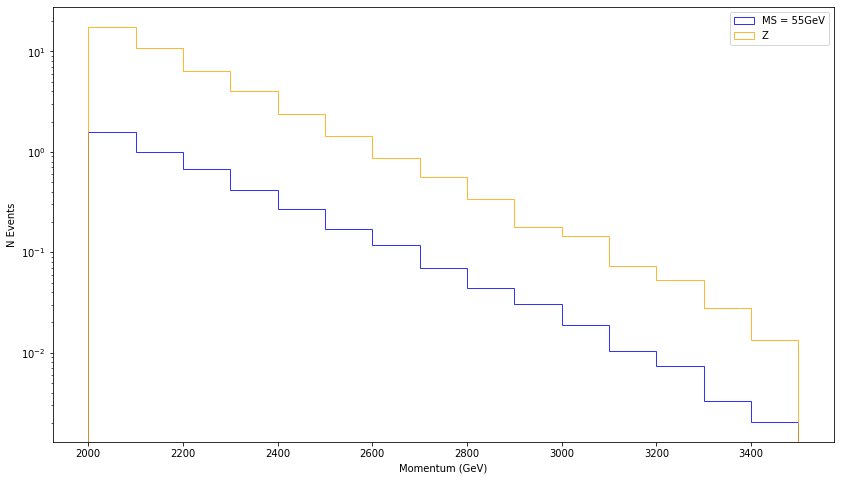

In [2]:
lhe_dm55= pylhe.readLHE("Events/with_ptj2000/run_hss_mdm55/unweighted_events.lhe")
nEvents_dm = 50000
crssSection_dm = 1.4774236344946001e-03 #fb

lhe_zj= pylhe.readLHE("Events/with_ptj2000/run_zvlvl/unweighted_events.lhe")
nEvents_zj = 50000
crssSection_zj = 1.4995641800000001e-02 #fb

plt.rcParams['figure.figsize'] = [14, 8]

weight_dm = [(crssSection_dm/nEvents_dm)*lumi]*nEvents_dm
pt_dm = []
for event in lhe_dm55:
    pt = transverse_momentum(event, jet_ids)
    pt_dm.append(pt)

weight_zj = [(crssSection_zj/nEvents_zj)*lumi]*nEvents_zj
pt_zj = []
for event in lhe_zj:
    pt = transverse_momentum(event, jet_ids)
    pt_zj.append(pt)

fig, ax = plt.subplots(1, 1)
bins = range(2000, 3600, 100)

# histogram for "p p > H  j, H > S S - MS= 55Gev"
ns_ms55, bins_ms55, patches_ms55 = ax.hist(pt_dm, bins = bins, alpha=0.8, color='blue', label='MS = 55GeV', log=True, edgecolor='blue', histtype='step', weights= weight_dm)
ns_zj, bins_zj, patches_zj = ax.hist(pt_zj, bins = bins, alpha=0.8, color='orange', label='Z', log=True, edgecolor='orange', histtype='step', weights= weight_zj)
ax.set(xlabel='Momentum (GeV)', ylabel='N Events')
ax.legend()

print(sum(ns_ms55), sum(ns_zj))
r = sum(ns_ms55)/(2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj)))
print(r)
print((2*np.sqrt((0.05*sum(ns_zj))**2+sum(ns_zj))))
#PEDIR PRO HIST RETORNAR OS BINS E SOMAR PRA VER SE TA CERTO O Z
#colocar luminosidade